In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv("smartcart_customers.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [4]:
df.shape

(2240, 22)

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

## handle missing values 

In [6]:
df["Income"] = df["Income"].fillna(df["Income"].median())

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


## feature engineering

In [9]:
#age 
df["Age"] = 2026-df["Year_Birth"]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,88,88,3,8,10,4,7,0,1,69
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,6,2,1,1,2,5,0,0,72
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,21,42,1,8,2,10,4,0,0,61
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,5,2,2,0,4,6,0,0,42
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,27,15,5,5,3,6,5,0,0,45


In [10]:
# Customer Joining Date
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

reference_date = df["Dt_Customer"].max()

df["Customer_Tenure_Days"] = (reference_date - df["Dt_Customer"]).dt.days

In [11]:
# Spending

df["Total_Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"]  + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [12]:
# Children
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

# Education

df["Education"].value_counts()

df["Education"] = df["Education"].replace({
    "Basic": "Undergraduate", "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate", "PhD": "Postgraduate"
})

# Marital Status

df["Living_With"] = df["Marital_Status"].replace({
    "Married": "Partner", "Together": "Partner",
    "Single": "Alone", "Divorced": "Alone",
    "Widow": "Alone", "Absurd": "Alone", "YOLO": "Alone"
})

In [13]:
df["Education"].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [14]:
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

## Drop Columns 

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,1,69,663,1617,0,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,72,113,27,2,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,61,312,776,0,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,42,139,53,1,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,45,161,422,1,Partner


In [16]:
cols = ["ID", "Year_Birth", "Marital_Status", "Kidhome", "Teenhome", "Dt_Customer"]
spending_cols = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

cols_to_drop = cols + spending_cols

df_cleaned = df.drop(columns=cols_to_drop)

In [17]:
df_cleaned.shape

(2240, 15)

In [18]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


## Handling Outliers

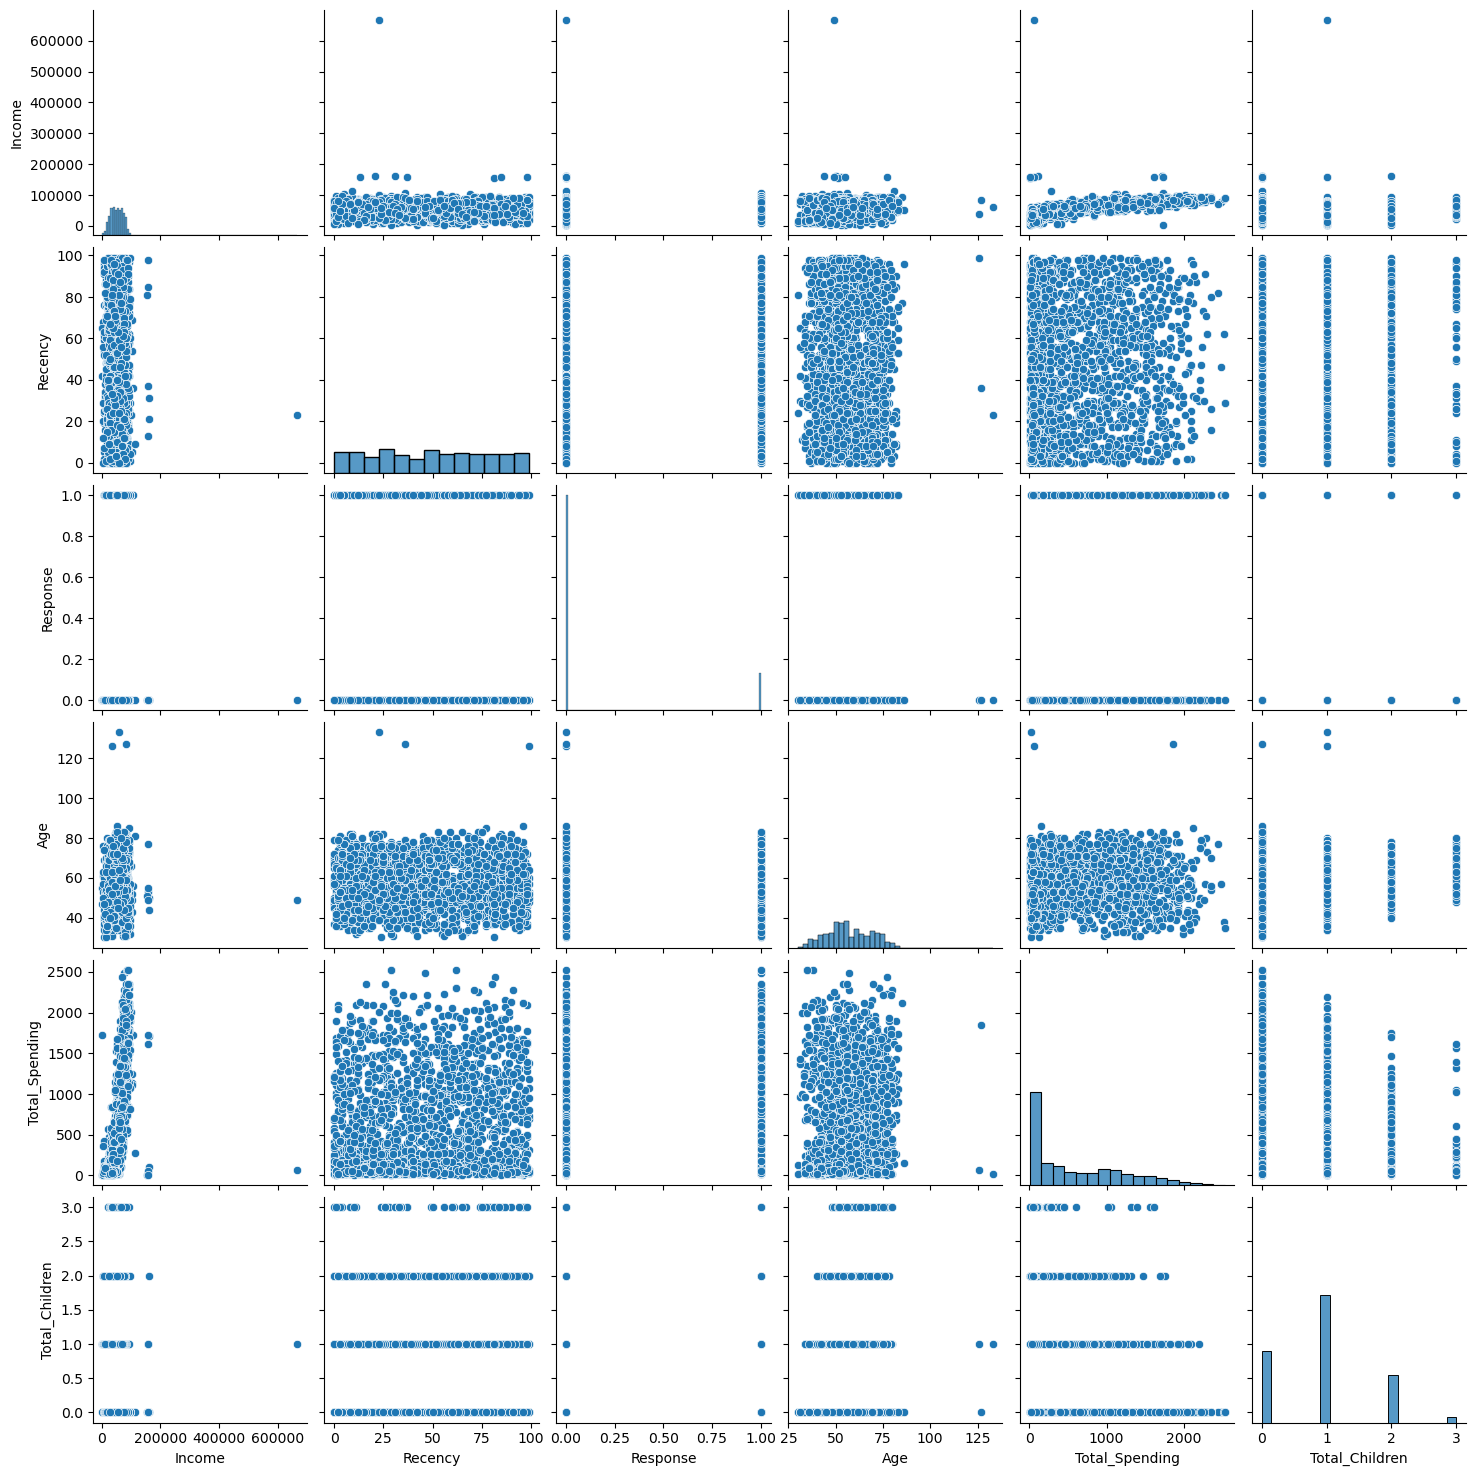

In [19]:
cols = ["Income", "Recency", "Response", "Age", "Total_Spending", "Total_Children"]

# relative plots of some features-  pair plots
sns.pairplot(df_cleaned[cols])

In [20]:
# Remove outliers

print("data size with outliers:", len(df_cleaned))

df_cleaned = df_cleaned[ (df_cleaned["Age"] < 90) ]
df_cleaned = df_cleaned[ (df_cleaned["Income"] < 600_000) ]

print("data size without outliers:", len(df_cleaned))

data size with outliers: 2240
data size without outliers: 2236


## Heatmap

In [21]:
corr = df_cleaned.corr(numeric_only=True)

<Axes: >

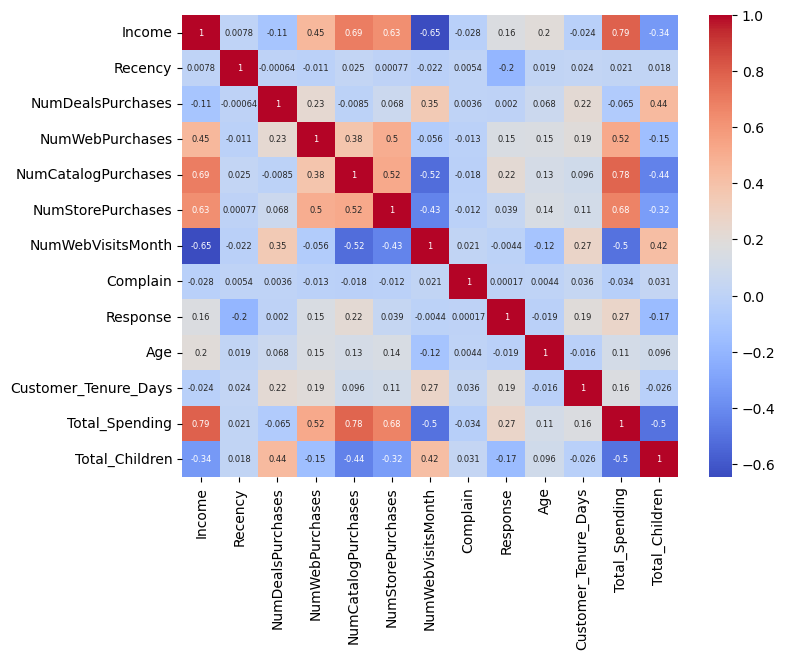

In [22]:
plt.figure(figsize=(8, 6))

sns.heatmap(
    corr,
    annot=True,
    annot_kws={"size": 6},
    cmap="coolwarm"
)

In [23]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


## Encodng 

In [24]:
from sklearn.preprocessing import OneHotEncoder 

In [26]:
ohe = OneHotEncoder()

cat_cols = ["Education" , "Living_With"]

enc_cols = ohe.fit_transform(df_cleaned[cat_cols])

In [27]:
# encodind on cols ke bad hume d me convert karna padta hai cols ko 

enc_df = pd.DataFrame(enc_cols.toarray() , columns = ohe.get_feature_names_out(cat_cols) , index= df_cleaned.index)

In [28]:
df_encoded = pd.concat([df_cleaned.drop(columns=cat_cols),enc_df], axis=1)

In [29]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


In [30]:
df_encoded.shape

(2236, 18)

## scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
X = df_encoded 

In [33]:
X

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,2,9,3,4,5,0,0,59,381,1341,1,1.0,0.0,0.0,0.0,1.0
2236,64014.0,56,7,8,2,5,7,0,0,80,19,444,3,0.0,1.0,0.0,0.0,1.0
2237,56981.0,91,1,2,3,13,6,0,0,45,155,1241,0,1.0,0.0,0.0,1.0,0.0
2238,69245.0,8,2,6,5,10,3,0,0,70,156,843,1,0.0,1.0,0.0,0.0,1.0


In [34]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [36]:
X_scaled

array([[ 0.28894655,  0.30685572,  0.34873831, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [-0.262003  , -0.38397129, -0.16869955, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.91842301, -0.7984675 , -0.68613742, ..., -0.35877969,
        -0.74204052,  0.74204052],
       ...,
       [ 0.234898  ,  1.44672029, -0.68613742, ..., -0.35877969,
         1.3476353 , -1.3476353 ],
       [ 0.80780332, -1.42021181, -0.16869955, ..., -0.35877969,
        -0.74204052,  0.74204052],
       [ 0.04280841, -0.31488859,  0.34873831, ..., -0.35877969,
        -0.74204052,  0.74204052]], shape=(2236, 18))

## Visualize 

In [38]:
# 2d 
from sklearn.decomposition import PCA 

In [40]:
pca = PCA(n_components=3)

X_pca = pca.fit_transform(X_scaled)

In [41]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

Text(0.5, 0.92, '3d projection')

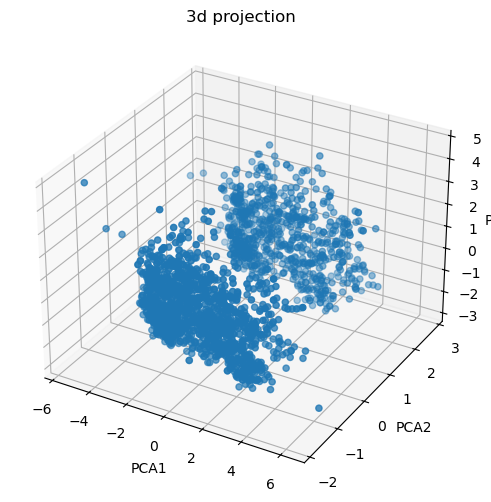

In [44]:
# plot
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d projection")

## Analyze K value 

- 1. Elbow method - 

In [48]:
!pip install kneed

In [49]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)
    

In [50]:
knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
optimal_k = knee.elbow     

In [51]:
print("best k =", optimal_k)

best k = 4


Text(0, 0.5, 'WCSS')

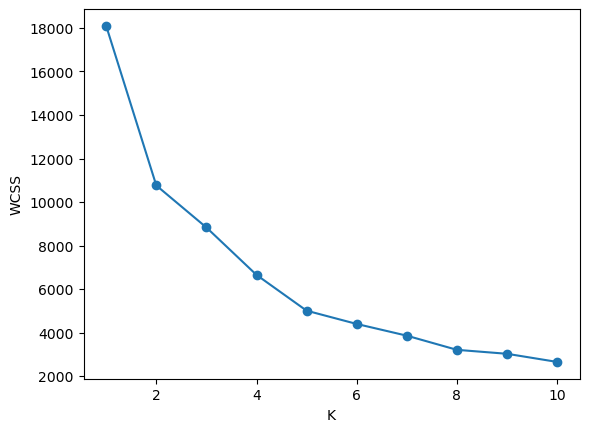

In [52]:
# plot

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("K")
plt.ylabel("WCSS")

## 2. Silhoutte Score 

Text(0, 0.5, 'Silhouette score')

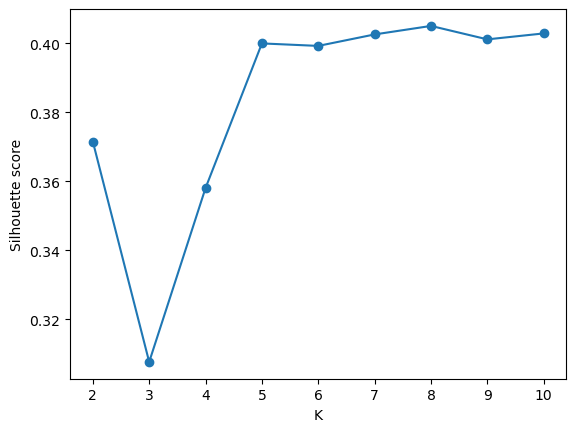

In [54]:
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores.append(score)

# plot
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette score")

Text(0, 0.5, 'SS')

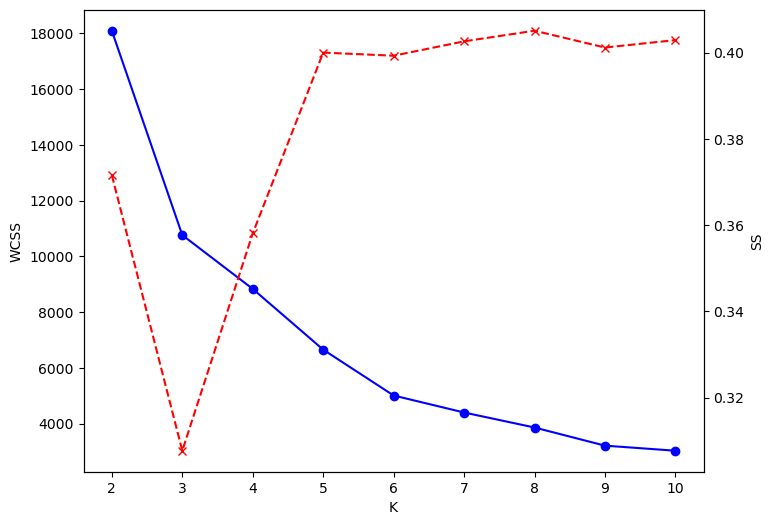

In [55]:
# combined plot

k_range = range(2, 11)

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(k_range, wcss[:len(k_range)], marker="o", color="blue") 
ax1.set_xlabel("K")
ax1.set_ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(k_range, scores[:len(k_range)], marker="x", color="red", linestyle="--")
ax2.set_ylabel("SS")

## Clusterung 

In [56]:
# K_means

kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)

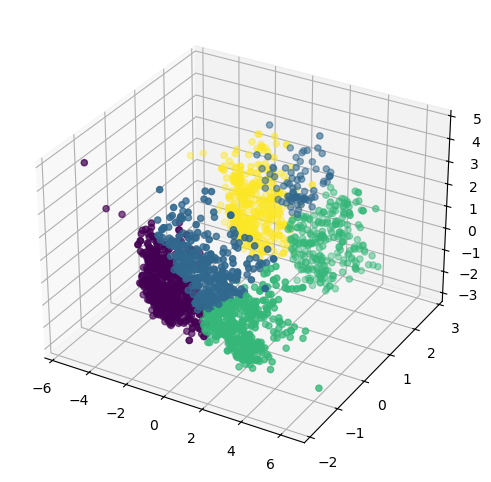

In [57]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_kmeans)

In [58]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

In [59]:
agg_clf = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_agg = agg_clf.fit_predict(X_pca)

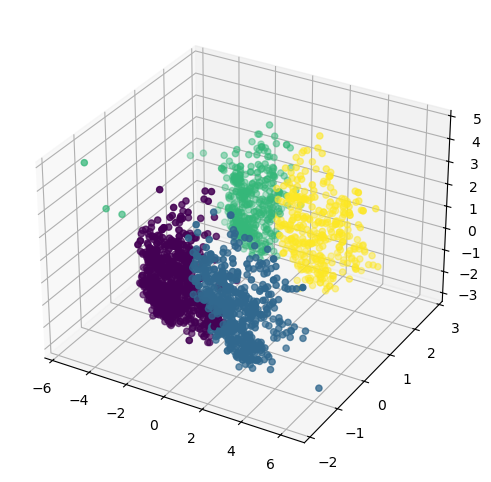

In [60]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_agg)

## Characterization of clusters 

In [61]:
X["cluster"] = labels_agg

In [62]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,cluster
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='cluster', ylabel='count'>

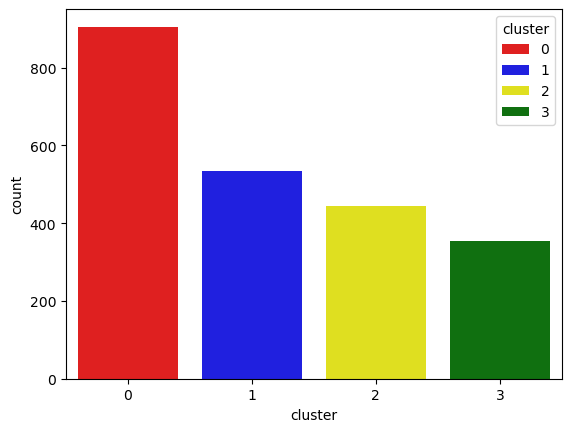

In [63]:
pal = ["red", "blue", "yellow", "green"]

sns.countplot(x=X["cluster"], palette=pal, hue=X["cluster"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

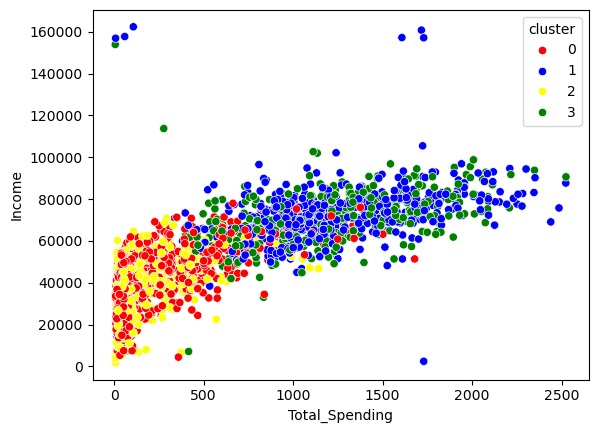

In [64]:
# Income & Spending patterns

sns.scatterplot(x=X["Total_Spending"], y=X["Income"], hue=X["cluster"], palette=pal)

In [65]:
# Cluster Summary

cluster_summary = X.groupby("cluster").mean()
print(cluster_summary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39680.580110  48.914917           2.594475         3.153591   
1        72808.445693  49.202247           1.958801         5.687266   
2        36960.143018  48.319820           2.594595         2.713964   
3        70722.681303  50.504249           1.855524         5.790368   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.969061           4.143646           6.307182  0.011050   
1                   5.498127           8.659176           3.580524  0.005618   
2                   0.837838           3.623874           6.659910  0.011261   
3                   5.014164           8.430595           3.728045  0.005666   

         Response        Age  Customer_Tenure_Days  Total_Spending  \
cluster         